In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_validate
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from matplotlib import cm
from sklearn.metrics import silhouette_samples
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering 
from sklearn.metrics.cluster import adjusted_rand_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

import copy
import warnings
warnings.resetwarnings()
warnings.simplefilter('ignore', FutureWarning)
warnings.simplefilter('ignore', RuntimeWarning)
from sklearn.exceptions import ConvergenceWarning
ConvergenceWarning('ignore')

sklearn.exceptions.ConvergenceWarning('ignore')

In [2]:
train_set = pd.read_csv("/Users/nrgsg/Desktop/courses/CSE-546/final project/VMMR_subset_images/train_features.csv", header=None)
x_train = np.array(train_set)
validation_set = pd.read_csv("/Users/nrgsg/Desktop/courses/CSE-546/final project/VMMR_subset_images/train_data.csv", header=None)
Y_train = np.array(validation_set[list(validation_set.columns[-1:])])
Y_train = np.array(Y_train).reshape((-1))



In [3]:
print("train_set=", x_train.shape)
print("validation_set=",Y_train.shape)

train_set= (5000, 512)
validation_set= (5000,)


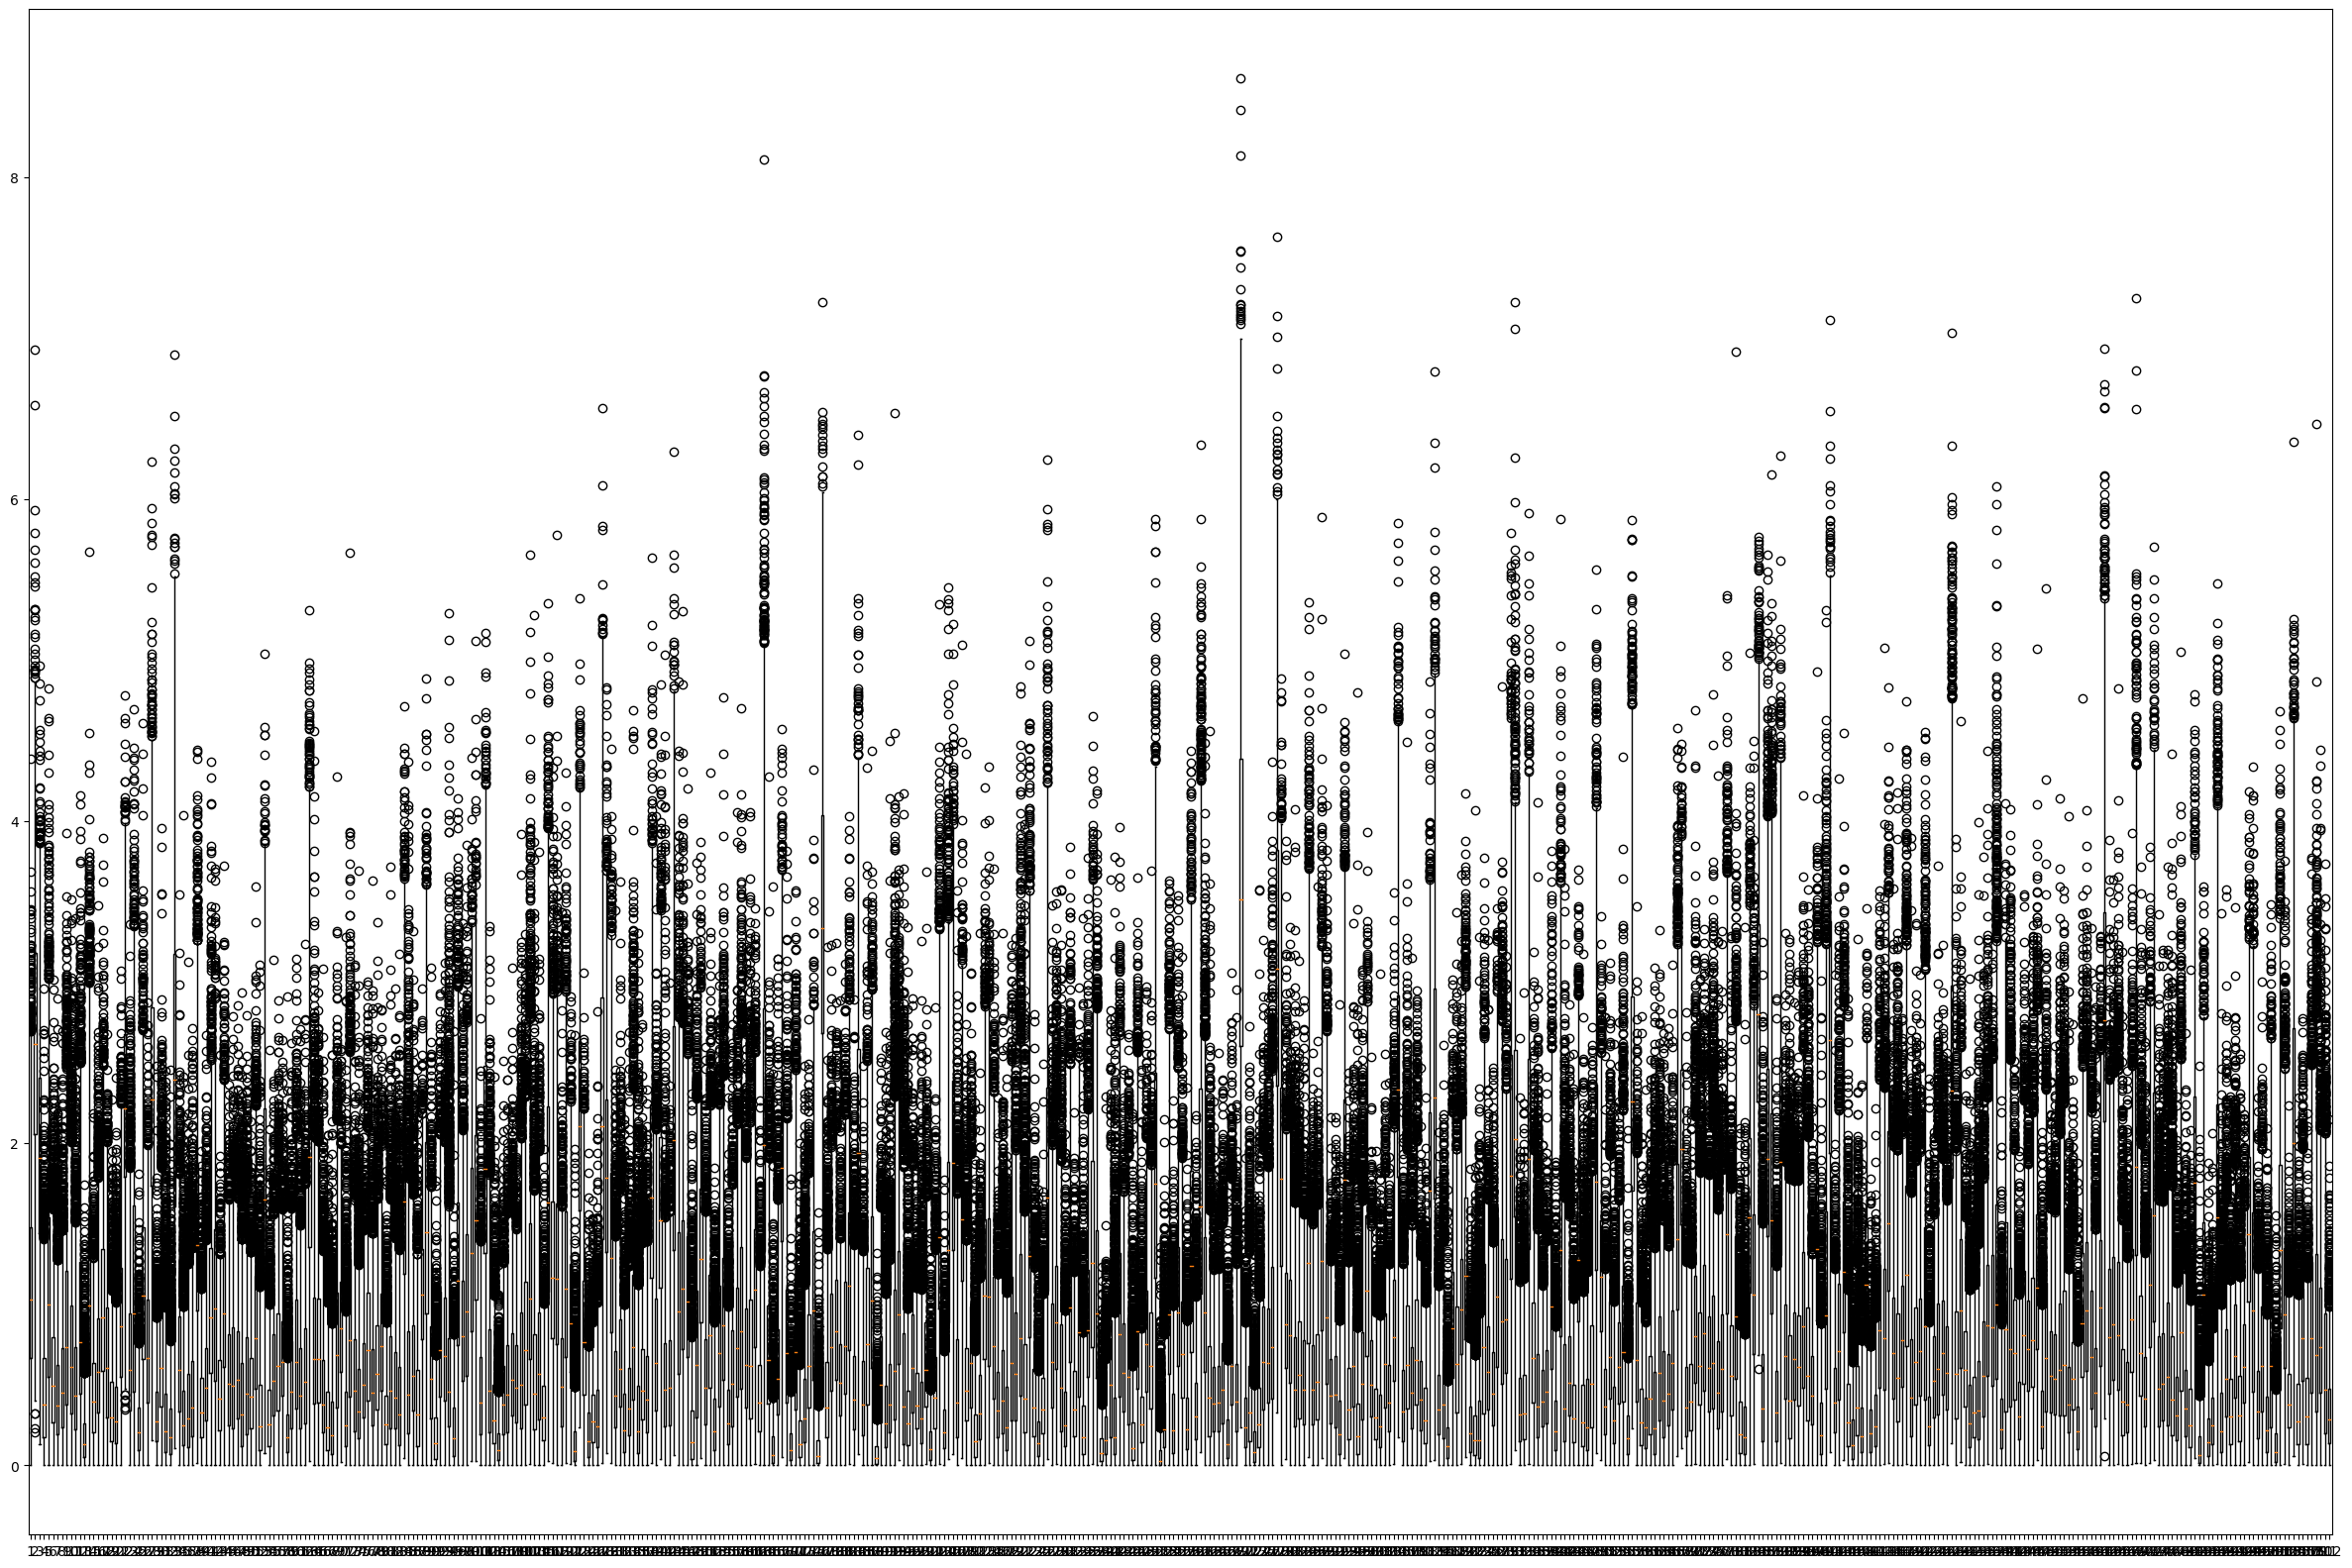

In [4]:
plt.figure(figsize=(30, 20))
plt.boxplot(x_train)
# plt.xticks(range(1,999),list(X_testt.columns[1:-1]), rotation=90)
plt.show()

In [5]:
X_trainval, X_test, y_trainval, y_test = train_test_split (x_train, Y_train, random_state=0) 
print("X_trainval.shape:",X_trainval.shape)
print("X_test.shape:",X_test.shape)

X_trainval.shape: (3750, 512)
X_test.shape: (1250, 512)


In [6]:
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()
scaler.fit(X_trainval)
# X_train = scaler.transform (X_train)
X_trainval = scaler.transform (X_trainval)
X_test = scaler.transform (X_test)
X_train, X_valid, y_train, y_valid = train_test_split (X_trainval, y_trainval, random_state=1)
print("X_train.shape:",X_train.shape)
print("X_valid.shape:",X_valid.shape)

X_train.shape: (2812, 512)
X_valid.shape: (938, 512)


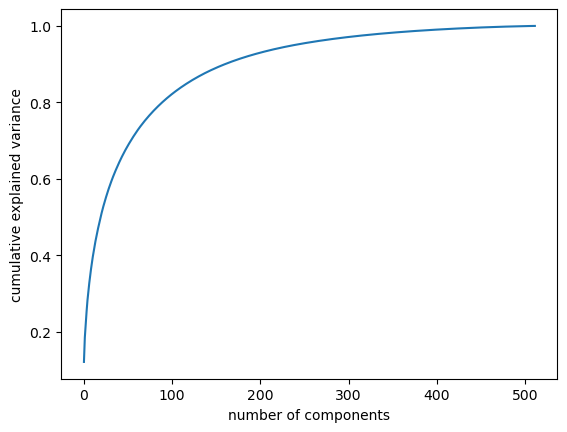

cumulative explained variance[200]: 0.9296031876421696
cumulative explained variance[300]: 0.970868823613553


In [22]:
## pca
pca = PCA(n_components=512)
X_train_pca = pca.fit_transform(X_trainval)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
# plt.bar(range(0,len(pca.explained_variance_ratio_)), pca.explained_variance_ratio_, alpha=0.5, align='center', label='Individual explained variance')
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
plt.show()
print("cumulative explained variance[200]:",np.cumsum(pca.explained_variance_ratio_)[199])
print("cumulative explained variance[300]:",np.cumsum(pca.explained_variance_ratio_)[299])

In [15]:
## pca (n_components=200)
pca1 = PCA(n_components=200)
X_train_pca = pca1.fit_transform(X_trainval)
print("pca.components_.shape: {}".format(pca1.components_.shape))

pca.components_.shape: (200, 512)


In [26]:
## data mapping
kmeans = KMeans(n_clusters=200, random_state=0)
kmeans.fit(X_trainval)
# y_pred_map = kmeans.predict(X_trainval)
distance_features = kmeans.transform(X_trainval)
print("Actual feature shape: {}".format(X_trainval.shape))
print("Distance feature shape: {}".format(distance_features.shape))

Actual feature shape: (3750, 512)
Distance feature shape: (3750, 200)


# classification

In [52]:
# Classifier #1

clf1 = GaussianNB()
cv_results_clf1 = cross_validate(clf1, X_trainval, y_trainval, cv=4, return_train_score=True)
train_accs_clf1=np.round(100*np.mean(cv_results_clf1["train_score"]),2)
val_accs_clf1=np.round(100*np.mean(cv_results_clf1["test_score"]),2)
# print("train_acc_clf1=",train_accs_clf1,"val_accs_clf1 =",val_accs_clf1)
print("Accuracy on training set: {:.3f}".format(train_accs_clf1)) 
print("Accuracy on test set: {:.3f}".format(val_accs_clf1))

Accuracy on training set: 63.620
Accuracy on test set: 58.030


In [51]:
# Classifier #2
clf2=DecisionTreeClassifier(random_state=0)
cv_results_clf2 = cross_validate(clf2, X_trainval, y_trainval, cv=4, return_train_score=True)
train_accs_clf2=np.round(100*np.mean(cv_results_clf2["train_score"]),2)
val_accs_clf2=np.round(100*np.mean(cv_results_clf2["test_score"]),2)
# print("train_acc_clf2=",train_accs_clf2,"val_accs_clf2 =",val_accs_clf2)
print("Accuracy on training set: {:.3f}".format(train_accs_clf2)) 
print("Accuracy on test set: {:.3f}".format(val_accs_clf2))

Accuracy on training set: 100.000
Accuracy on test set: 36.350


In [50]:
# Classifier #3
clf3= RandomForestClassifier (n_estimators=5, random_state=2)
cv_results_clf3 = cross_validate(clf3, X_trainval, y_trainval, cv=4, return_train_score=True)
train_accs_clf3=np.round(100*np.mean(cv_results_clf3["train_score"]),2)
val_accs_clf3=np.round(100*np.mean(cv_results_clf3["test_score"]),2)
# print("train_acc_clf2=",train_accs_clf2,"val_accs_clf2 =",val_accs_clf2)
print("Accuracy on training set: {:.3f}".format(train_accs_clf3)) 
print("Accuracy on test set: {:.3f}".format(val_accs_clf3))

Accuracy on training set: 95.560
Accuracy on test set: 38.400


In [53]:
# Classifier #3
# n_est=[1,3,5,10,20,50,100]
n_est=[1,3,5,10,20,50,100,150,200,400,500,1000]
# alpha=[0.001,0.002,0.005,0.01,0.02,0.05,0.1,0.2,0.5,1,5,10]
val_accs_clf3  = []
train_accs_clf3= []
for n in n_est:
    val_acc_clf3  = []
    train_acc_clf3= []
    clf3= GradientBoostingClassifier (n_estimators=n, random_state=2)
    cv_results_clf3 = cross_validate(clf3, X_trainval, y_trainval, cv=4, return_train_score=True)
    train_accs_clf3.append(np.round(100*np.mean(cv_results_clf3["train_score"]),2))
    val_accs_clf3.append(np.round(100*np.mean(cv_results_clf3["test_score"]),2))
    train_acc_clf3.append(np.round(100*np.mean(cv_results_clf3["train_score"]),2))
    val_acc_clf3.append(np.round(100*np.mean(cv_results_clf3["test_score"]),2))
    print("n_estimators:",n,"train_acc_gbrt=",train_acc_clf3,"val_accs_gbrt =",val_acc_clf3)
#     print("train_accs_RF=",train_accs_RF)

n_estimators: 1 train_acc_gbrt= [49.48] val_accs_gbrt = [37.44]
n_estimators: 3 train_acc_gbrt= [61.32] val_accs_gbrt = [44.83]
n_estimators: 5 train_acc_gbrt= [67.31] val_accs_gbrt = [48.45]
n_estimators: 10 train_acc_gbrt= [76.59] val_accs_gbrt = [53.17]
n_estimators: 20 train_acc_gbrt= [87.7] val_accs_gbrt = [58.05]
n_estimators: 50 train_acc_gbrt= [98.6] val_accs_gbrt = [63.49]


KeyboardInterrupt: 

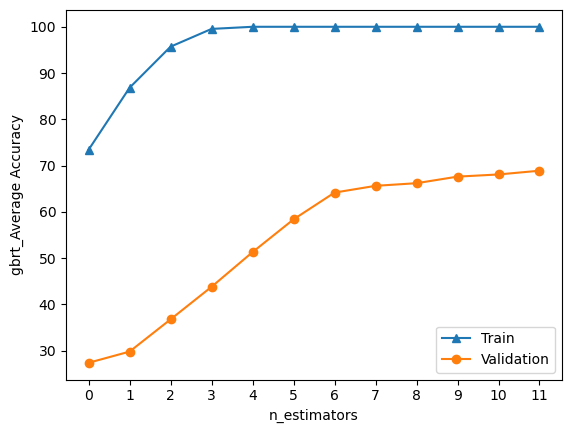

In [46]:
p=np.arange(len(n_est))
plt.plot(p,train_accs_clf3, marker="^",label="Train")
plt.plot(p,val_accs_clf3, marker="o", label="Validation")
_ = plt.xticks(p)
plt.xlabel("n_estimators")
plt.ylabel("gbrt_Average Accuracy")
# plt.ylim(bottom=75, top=100)
plt.legend()